In [8]:
!pip install kaggle --quiet

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:04<00:00, 170MB/s]
100% 812M/812M [00:04<00:00, 187MB/s]


In [10]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [11]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [12]:
import os
path , dirs, files = next(os.walk('train'))
file_count = len(files)
print(file_count)

25000


In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

## Display Images

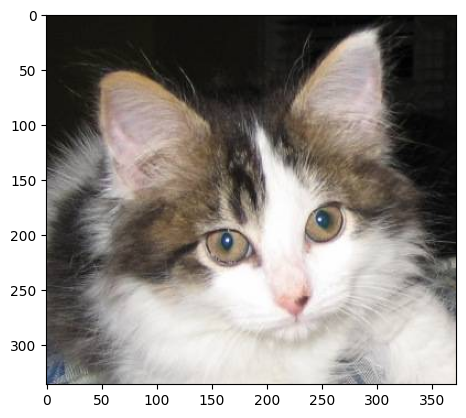

In [14]:
cat_img = mpimg.imread('train/cat.10046.jpg')
plt.imshow(cat_img)

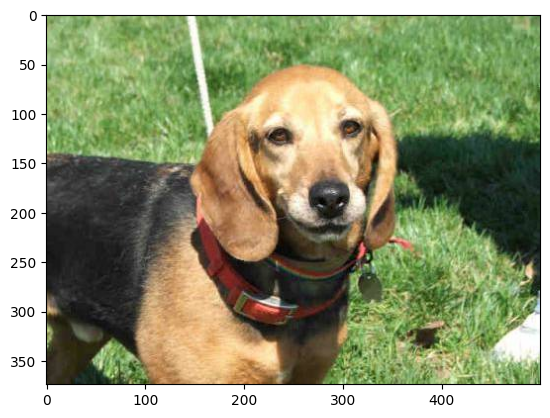

In [15]:
dog_img = mpimg.imread('train/dog.1206.jpg')
plt.imshow(dog_img)

## Resizing all the images

In [16]:
# creating directory for resized images
os.mkdir('resized_images')

orignal_folder = 'train/'
resized_folder = 'resized_images/'

#transfering 2000 images from train/ to resized_images/
for i in range(2000):
    filename = os.listdir(orignal_folder)[i*3]
    img_path = orignal_folder + filename
    img = Image.open(img_path)
    img = img.resize((224,224))
    img = img.convert('RGB')
    img.save(resized_folder + filename)

In [18]:
os.listdir('resized_images')

['cat.7511.jpg',
 'dog.3808.jpg',
 'cat.898.jpg',
 'cat.4793.jpg',
 'cat.1830.jpg',
 'dog.3581.jpg',
 'dog.8006.jpg',
 'dog.8993.jpg',
 'cat.1002.jpg',
 'dog.11971.jpg',
 'cat.5693.jpg',
 'cat.1400.jpg',
 'dog.10308.jpg',
 'cat.1121.jpg',
 'cat.181.jpg',
 'cat.4444.jpg',
 'cat.3390.jpg',
 'cat.8672.jpg',
 'cat.958.jpg',
 'dog.6772.jpg',
 'cat.5375.jpg',
 'dog.493.jpg',
 'cat.4808.jpg',
 'cat.4173.jpg',
 'dog.7512.jpg',
 'dog.3494.jpg',
 'cat.6242.jpg',
 'cat.988.jpg',
 'dog.12470.jpg',
 'dog.3539.jpg',
 'dog.10162.jpg',
 'dog.10939.jpg',
 'cat.7011.jpg',
 'cat.1020.jpg',
 'dog.11196.jpg',
 'cat.9070.jpg',
 'cat.2596.jpg',
 'dog.969.jpg',
 'cat.5823.jpg',
 'cat.2731.jpg',
 'dog.4808.jpg',
 'cat.7172.jpg',
 'cat.10356.jpg',
 'dog.4566.jpg',
 'dog.1135.jpg',
 'cat.1488.jpg',
 'cat.7317.jpg',
 'cat.3685.jpg',
 'cat.7633.jpg',
 'dog.811.jpg',
 'cat.7990.jpg',
 'dog.458.jpg',
 'dog.10989.jpg',
 'dog.9161.jpg',
 'cat.1008.jpg',
 'cat.12088.jpg',
 'cat.73.jpg',
 'dog.7212.jpg',
 'dog.11405.jpg

(224, 224, 3)


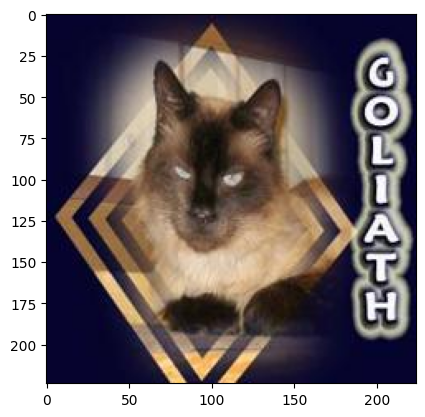

In [19]:
cat_img = mpimg.imread('resized_images/cat.3536.jpg')
print(cat_img.shape)
plt.imshow(cat_img)

(224, 224, 3)


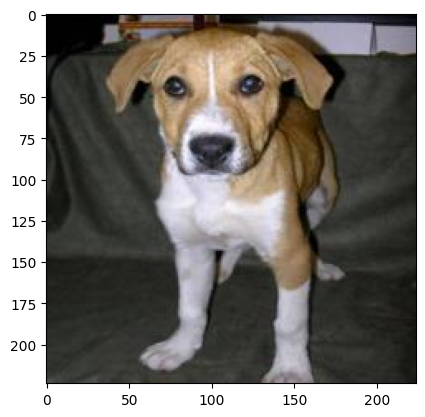

In [20]:
dog_img = mpimg.imread('resized_images/dog.8728.jpg')
print(dog_img.shape)
plt.imshow(dog_img)

## creating labels for resized images

cat --> 0

dog --> 1

In [21]:
file_names = os.listdir('resized_images')
labels = []
for file_name in file_names:
    if file_name.startswith('cat'):
        labels.append(0)
    elif file_name.startswith('dog'):
        labels.append(1)

In [22]:
# counting images of dogs and cats
print(str(labels.count(0)) + " cats")
print(str(labels.count(1)) + " dogs")

997 cats
1003 dogs


### converting all the resized images to numpy arrays

In [23]:
import cv2
import glob

In [24]:
img_dir = 'resized_images/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(img_dir + '*.' + ext)) for ext in image_extension]

dog_cat_images = np.array([cv2.imread(file) for file in files])


In [25]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [26]:
X = dog_cat_images
y = np.asarray(labels)

In [27]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [28]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [29]:
X_train_scaled

array([[[[0.32156863, 0.38823529, 0.37647059],
         [0.34901961, 0.41568627, 0.40392157],
         [0.35686275, 0.40784314, 0.4       ],
         ...,
         [0.18823529, 0.21960784, 0.21960784],
         [0.23137255, 0.27843137, 0.28627451],
         [0.21960784, 0.27843137, 0.28627451]],

        [[0.32156863, 0.38823529, 0.37647059],
         [0.34901961, 0.41568627, 0.40392157],
         [0.35686275, 0.40784314, 0.4       ],
         ...,
         [0.20784314, 0.23921569, 0.23921569],
         [0.25490196, 0.30196078, 0.30980392],
         [0.24705882, 0.30588235, 0.31372549]],

        [[0.32156863, 0.38823529, 0.37647059],
         [0.34901961, 0.41568627, 0.40392157],
         [0.35686275, 0.40784314, 0.4       ],
         ...,
         [0.22352941, 0.25490196, 0.25490196],
         [0.2745098 , 0.32156863, 0.32941176],
         [0.27058824, 0.32941176, 0.3372549 ]],

        ...,

        [[0.57647059, 0.46666667, 0.34509804],
         [0.59607843, 0.48235294, 0.36078431]

## Building the NN

In [30]:
import tensorflow as tf
import tensorflow_hub as hub


In [31]:
mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector/4?tfhub-redirect=true'
pretrained_model = hub.KerasLayer(mobilenet_model, trainable=False, input_shape=(224, 224, 3))

In [32]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 10s 46ms/step - loss: 0.2269 - accuracy: 0.9000
Epoch 2/5
50/50 [==============================] - 2s 47ms/step - loss: 0.0716 - accuracy: 0.9781
Epoch 3/5
50/50 [==============================] - 2s 46ms/step - loss: 0.0554 - accuracy: 0.9837
Epoch 4/5
50/50 [==============================] - 2s 44ms/step - loss: 0.0454 - accuracy: 0.9900
Epoch 5/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0354 - accuracy: 0.9937


In [34]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test loss:', score)
print('Test accuracy:', acc)

13/13 [==============================] - 4s 178ms/step - loss: 0.0440 - accuracy: 0.9775
Test loss: 0.04398639500141144
Test accuracy: 0.9775000214576721


## predictive system

Enter the path of the image: cat.jpg


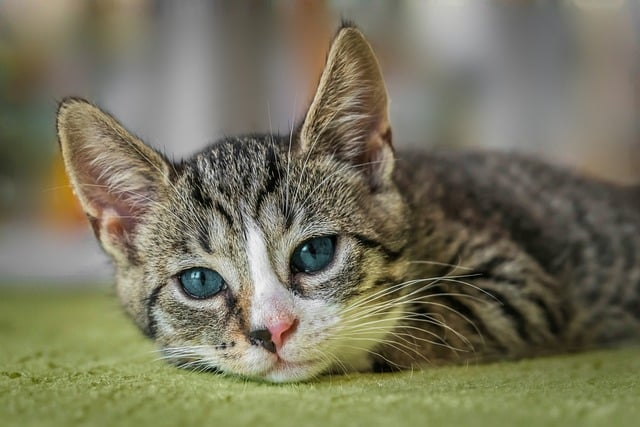

1/1 [==============================] - 0s 32ms/step
The image is a cat


In [42]:
input_img_path = input('Enter the path of the image: ')
input_img = cv2.imread(input_img_path)

cv2_imshow(input_img)
input_img = cv2.resize(input_img, (224, 224))

input_img_scaled = input_img/255
input_img_reshaped = np.reshape(input_img_scaled, [1, 224, 224, 3])

input_pred = model.predict(input_img_reshaped)
input_pred_label = np.argmax(input_pred)
if input_pred_label == 0:
    print('The image is a cat')
else:
    print('The image is a dog')